In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pandas as pd
from ipywidgets import widgets
from tabulate import tabulate
from sklearn.svm import SVC

### Requirement Files

In [ ]:
ipywidgets          7.7.1
matplotlib          3.7.1
numpy               1.22.4
pandas              1.5.3
scipy               1.10.1
seaborn             0.12.2
session_info        1.0.0
sklearn             1.2.2
tabulate            0.8.10

# Addition
PIL                 8.4.0
backcall            0.2.0
cachetools          5.3.0
certifi             2022.12.07
cffi                1.15.1
chardet             4.0.0
charset_normalizer  2.0.12
cloudpickle         2.2.1
contourpy           1.0.7
cryptography        40.0.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
db_dtypes           1.1.1
debugpy             1.6.6
decorator           4.4.2
defusedxml          0.7.1
google              NA
grpc                1.54.0
grpc_status         NA
httplib2            0.21.0
idna                3.4
ipykernel           5.5.6
ipython_genutils    0.2.0
joblib              1.2.0
kiwisolver          1.4.4
matplotlib_inline   0.1.6
mpl_toolkits        NA
numexpr             2.8.4
packaging           23.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.3.0
portpicker          NA
prompt_toolkit      3.0.38
proto               NA
psutil              5.9.5
ptyprocess          0.7.0
pyarrow             9.0.0
pydev_ipython       NA
pydevconsole        NA
pydevd              2.9.5
pydevd_file_utils   NA
pydevd_plugins      NA
pydevd_tracing      NA
pygments            2.14.0
pyparsing           3.0.9
pytz                2022.7.1
requests            2.27.1
setuptools          67.7.2
shapely             2.0.1
sitecustomize       NA
six                 1.16.0
socks               1.7.1
sphinxcontrib       NA
statsmodels         0.13.5
storemagic          NA
threadpoolctl       3.1.0
tornado             6.3.1
tqdm                4.65.0
traitlets           5.7.1
typing_extensions   NA
urllib3             1.26.15
wcwidth             0.2.6
zmq                 23.2.1
zoneinfo            NA
-----
IPython             7.34.0
jupyter_client      6.1.12
jupyter_core        5.3.0
notebook            6.4.8
-----
Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Linux-5.15.107+-x86_64-with-glibc2.31

In [ ]:
csv_path='/content/ready_df'#@param {type:"string"}
df=pd.read_csv(csv_path)

This function is designed for classification problems. It accepts a dataframe and two features as inputs and performs logistic regression and support vector machine (SVM) classification. It also generates plots to visualize decision boundaries for both linear and non-linear graphs. By calling the function, you can select the desired model (logistic regression or SVM) and specify the degree of the curve (2, 3, 4, 5, 8, 6, 7, etc.) for non-linear graphs. This allows you to compare the results obtained from different models and curve degrees.

x_1 : Add first feature.

x_2 : Add second feature.

target : Add Target feature.




In [ ]:
y_pred=0
def logistic_regression(df: pd.DataFrame):

    """
    Function for Comparion  Classification model

    Parameters: df:(data Frame)


    return: Graphs and Reports in tabular form
    """


    x_1= 'Plasma glucose concentration' #@param {type:"string"}
    x_2='Body mass index (weight in kg/(height in m)^2)' #@param {type:"string"}
    X=df[[x_1,x_2]]
    target='target' #@param {type:"string"}
    y=df[target]
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

    print("""
    Which model you have to use :
    1.Logistic Regression
    2.For high Degree of logistic Regression
    3.Support Vector Machine
    """)


    degree=int(input("choice the model :\n "))

    if degree==1:
        global y_pred
        y_pred=None
        for degree in range(1,5):
            def mapFeature(X1, X2, degree):
                res = np.ones(X1.shape[0])
                for i in range(1,degree + 1):
                    for j in range(0,i + 1):
                        res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))

                return res
            poly_df=pd.DataFrame(X_test)
            # Get the features
            X_mapf= poly_df.iloc[:, :2]




            if degree==degree:
                X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
                # Get the target variable
                y_poly = y_test
                # componenet =X_test

                def sigmoid(z):
                    return 1 / (1 + np.exp(-z))

                def costFunc(theta, X, y):
                    m = y.shape[0]
                    z = X.dot(theta)
                    h = sigmoid(z)
                    global y_pred
                    y_pred=np.where(h>=0.5,1,0)

                    term1 = y * np.log(h)
                    term2 = (1- y) * np.log(1 - h)
                    J = -np.sum(term1 + term2, axis = 0) / m

                    return J


                # Set initial values for our parameters
                initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

                res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
                # our optimizated coefficients
                theta = res.x


                def plotDecisionBoundary(theta,degree, axes):
                    u = np.linspace(-1.5, 3, 50)
                    v = np.linspace(-1.5, 3, 50)
                    U,V = np.meshgrid(u,v)
                    # convert U, V to vectors for calculating additional features
                    # using vectorized implementation
                    U = np.ravel(U)
                    V = np.ravel(V)
                    Z = np.zeros((len(u) * len(v)))

                    X_poly = mapFeature(U, V, degree)
                    Z = X_poly.dot(theta)

                    # reshape U, V, Z back to matrix
                    U = U.reshape((len(u), len(v)))
                    V = V.reshape((len(u), len(v)))
                    Z = Z.reshape((len(u), len(v)))
                    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
                    axes.legend(labels=['diabetic','normal',  'Decision Boundary'])

                    return cs


                poly_df_with_y=poly_df
                poly_df_with_y['target']=y_test.values

                pos=poly_df_with_y['target']==1
                neg=poly_df_with_y['target']==0


                # Plot Decision boundary
                fig, axes = plt.subplots(figsize=(12,7));
                # axes.figure(figsize=(12,7))
                axes.set_xlabel('Feature 1')
                axes.set_ylabel('Feature 2')
                axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
                axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
                axes.legend(title='Legend', loc = 'best' )
                if degree==1:
                    axes.set_title('linear Decision Boundary for logistic regression ')
                    text = '\033[1m\033[34mlinear Decision Boundary Report\033[0m'

                elif degree==2:
                    axes.set_title('Quadratic Decision Boundary for logistic regression ')
                    text='\033[1m\033[34mQuadratic Decision Boundary Report\033[0m'
                elif degree==3:
                    axes.set_title('cubic Decision Boundary for logistic regression ')
                    text='\033[1m\033[34mcubic Decision Boundary Report\033[0m'
                else:
                    axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
                    text=f'\033[1m\033[34m{degree}th Degree Decision Boundary Report\033[0m'
                plotDecisionBoundary(theta, degree, axes)


            # Calculate accuracy score

            accuracy = accuracy_score(y_test, y_pred)

            # Generate classification report
            report = classification_report(y_test, y_pred)

            # Create table headers and data
            headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
            rows = []
            for line in report.split("\n")[2:-5]:
                class_info = line.split()
                class_name = class_info[0]
                precision, recall, f1_score, support = class_info[1:]
                rows.append([class_name, precision, recall, f1_score, support])
            rows.append(["Accuracy Score", "", "", "", accuracy])

            # Print table using tabulate
            print(text)
            print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

    elif degree==2:


        degree=int(input("How much degree curve you want :\n "))
        # global y_pred
        # y_pred=None

        def mapFeature(X1, X2, degree):
            res = np.ones(X1.shape[0])
            for i in range(1,degree + 1):
                for j in range(0,i + 1):
                    res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))

            return res
        poly_df=pd.DataFrame(X_test)
        # Get the features
        X_mapf= poly_df.iloc[:, :2]





        X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
        # Get the target variable
        y_poly = y_test
        # componenet =X_test

        def sigmoid(z):
            return 1 / (1 + np.exp(-z))

        def costFunc(theta, X, y):
            m = y.shape[0]
            z = X.dot(theta)
            h = sigmoid(z)
            global y_pred
            y_pred=np.where(h>=0.5,1,0)

            term1 = y * np.log(h)
            term2 = (1- y) * np.log(1 - h)
            J = -np.sum(term1 + term2, axis = 0) / m

            return J


        # Set initial values for our parameters
        initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

        res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))
        # our optimizated coefficients
        theta = res.x
        print('res-------',res)


        def plotDecisionBoundary(theta,degree, axes):
            u = np.linspace(-1.5, 3, 50)
            v = np.linspace(-1.5, 3, 50)
            U,V = np.meshgrid(u,v)
            # convert U, V to vectors for calculating additional features
            # using vectorized implementation
            U = np.ravel(U)
            V = np.ravel(V)
            Z = np.zeros((len(u) * len(v)))

            X_poly = mapFeature(U, V, degree)
            Z = X_poly.dot(theta)

            # reshape U, V, Z back to matrix
            U = U.reshape((len(u), len(v)))
            V = V.reshape((len(u), len(v)))
            Z = Z.reshape((len(u), len(v)))
            cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
            axes.legend(labels=['diabetic','normal',  'Decision Boundary'])
            # axes.set_title('linear Decision Boundary for logistic regression ')
            # text = '\033[1m\033[34mMulti Decision Boundary Report\033[0m'

            return cs


        poly_df_with_y=poly_df
        poly_df_with_y['target']=y_test.values

        pos=poly_df_with_y['target']==1
        neg=poly_df_with_y['target']==0


        # Plot Decision boundary
        fig, axes = plt.subplots(figsize=(12,7));
        # axes.figure(figsize=(12,7))
        axes.set_xlabel('Feature 1')
        axes.set_ylabel('Feature 2')
        axes.set_title(f'{degree}th Degree  Decision Boundary for logistic regression ')
        axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
        axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
        axes.legend(title='Legend', loc = 'best' )
        plotDecisionBoundary(theta, degree, axes)

        # Calculate accuracy score

        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)

        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print('\033[1m\033[34mMulti Decision Boundary Report\033[0m' )
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

    else:

        def mapFeature(X1, X2, degree):
                res = np.ones(X1.shape[0])
                for i in range(1,degree + 1):
                    for j in range(0,i + 1):
                        res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))

                return res


        def plotDecisionBoundary(theta,degree, axes):
            u = np.linspace(-1.5, 3, 50)
            v = np.linspace(-1.5, 3, 50)
            U,V = np.meshgrid(u,v)
            # convert U, V to vectors for calculating additional features
            # using vectorized implementation
            U = np.ravel(U)
            V = np.ravel(V)
            Z = np.zeros((len(u) * len(v)))

            X_poly = mapFeature(U, V, degree)
            Z = X_poly.dot(theta)

            # reshape U, V, Z back to matrix
            U = U.reshape((len(u), len(v)))
            V = V.reshape((len(u), len(v)))
            Z = Z.reshape((len(u), len(v)))
            cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
            axes.legend(labels=['diabetic','normal',  'Decision Boundary'])
            plt.show()

            return cs

        model = SVC(kernel = 'linear')
        model.fit(X_train, y_train)

        y_pred=model.predict(X_test)


        theta = np.concatenate((model.intercept_, model.coef_.flatten()))
        df_test=pd.DataFrame(X_test)
        df_test['target']=np.where(y_test==0,0,1)
        pos=df_test.target==1
        neg=df_test.target==0


        # Plot Decision boundary
        fig, axes = plt.subplots(figsize=(12,7));
        # axes.figure(figsize=(12,7))
        axes.set_xlabel('Feature 1')
        axes.set_ylabel('Feature 2')
        axes.set_title('Linear Decision Boundary for SVM  ')
        text = '\033[1mSVM Decision Boundary Report\033[0m'

        axes.scatter(df_test.loc[pos, 0], df_test.loc[pos, 1], color = 'r', marker='x', label='diabetic')
        axes.scatter(df_test.loc[neg, 0], df_test.loc[neg, 1], color = 'g', marker='o', label='normal')
        axes.legend(title='Legend', loc = 'best' )
        # plotDecisionBoundary(theta,1,axes)


        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)


        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print(text)
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))

        plotDecisionBoundary(theta,1,axes)

        # for poly SVC
        model = SVC(kernel='poly', degree=3,C=0.4)
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)

        def plot_decision_boundary(model, X, y):
            h = 0.02  # Step size in the mesh
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Predict the class labels for all points in the mesh grid
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

            # Reshape the predicted labels to match the mesh grid shape
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary and the data points
            fig, axes = plt.subplots(figsize=(12,7));
            # axes.figure(figsize=(12,7))
            axes.set_xlabel('Feature 1')
            axes.set_ylabel('Feature 2')
            axes.set_title('Poly Decision Boundary for SVM  ')
            text='\033[1m\033[SVM Decision Boundary Report\033[0m'
            plt.contour(xx, yy, Z, alpha=0.8,colors='black')
            axes.scatter(df_test.loc[pos, 0], df_test.loc[pos, 1], color = 'r', marker='x', label='diabetic')
            axes.scatter(df_test.loc[neg, 0], df_test.loc[neg, 1], color = 'g', marker='o', label='normal')
            axes.legend(title='Legend', loc = 'best' )

        plot_decision_boundary(model, X_test, y_test)

        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)


        # Create table headers and data
        headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
        rows = []
        for line in report.split("\n")[2:-5]:
            class_info = line.split()
            class_name = class_info[0]
            precision, recall, f1_score, support = class_info[1:]
            rows.append([class_name, precision, recall, f1_score, support])
        rows.append(["Accuracy Score", "", "", "", accuracy])

        # Print table using tabulate
        print(text)
        print(tabulate(rows, headers=headers, tablefmt="fancy_grid"))











    Which model you have to use :
    1.Logistic Regression
    2.For high Degree of logistic Regression
    3.Support Vector Machine
    
choice the model :
 3
SVM Decision Boundary Report
╒════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class          │ Precision   │ Recall   │ F1-Score   │   Support │
╞════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0              │ 0.76        │ 0.85     │ 0.81       │     95    │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1              │ 0.68        │ 0.55     │ 0.61       │     55    │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy Score │             │          │            │      0.74 │
╘════════════════╧═════════════╧══════════╧════════════╧═══════════╛


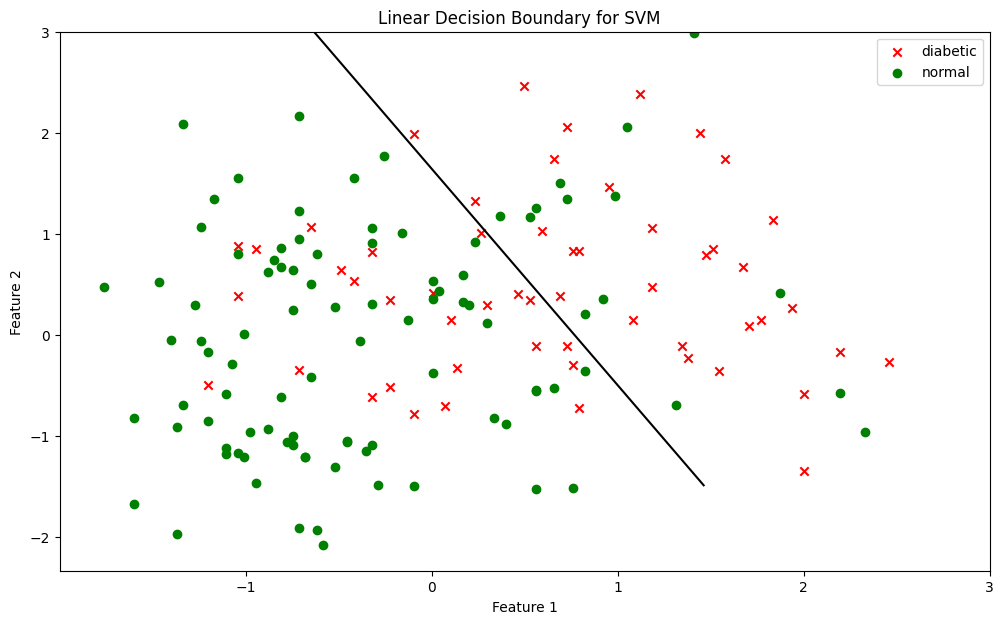

SVM Decision Boundary Report
╒════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class          │ Precision   │ Recall   │ F1-Score   │   Support │
╞════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0              │ 0.70        │ 0.95     │ 0.81       │ 95        │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1              │ 0.77        │ 0.31     │ 0.44       │ 55        │
├────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy Score │             │          │            │  0.713333 │
╘════════════════╧═════════════╧══════════╧════════════╧═══════════╛


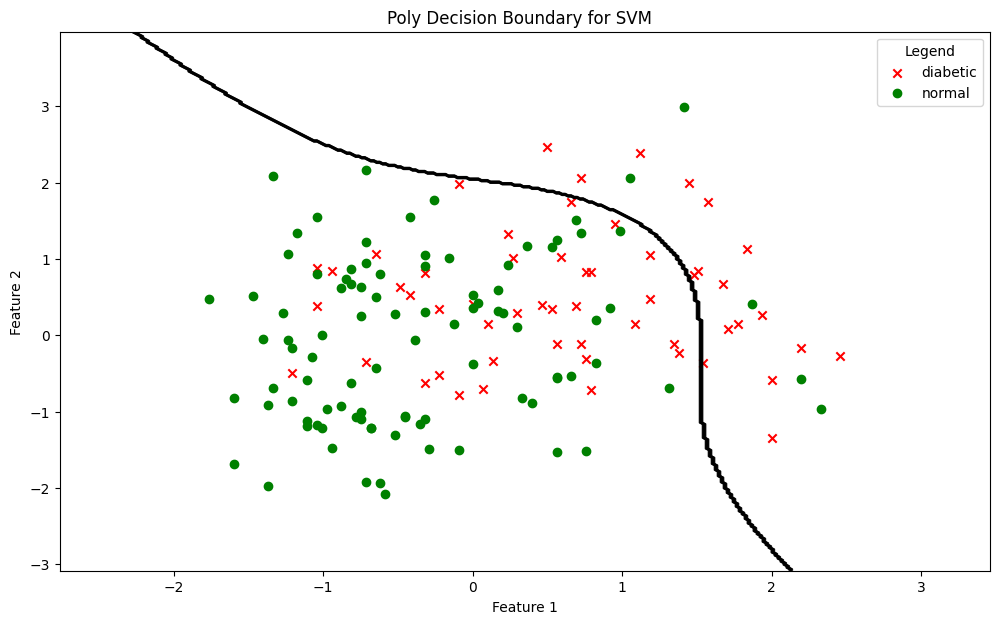

In [ ]:
logistic_regression(df)